In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import model_predict
import pickle
import sys, itertools

In [17]:
series = model_predict.read_data_series(scale=False, filter_early=False)

In [3]:
'''def test_stationarity(timeseries):
	dftest = adfuller(timeseries, autolag='AIC')
	print(f'ADF Statistic: {dftest[0]}')
	print(f'p-value: {dftest[1]}')
	plt.plot(timeseries)
	plt.show()
test_stationarity(np.diff(data, 2))
plot_acf(data, lags=30)
plot_pacf(data, lags=30)'''

"def test_stationarity(timeseries):\n\tdftest = adfuller(timeseries, autolag='AIC')\n\tprint(f'ADF Statistic: {dftest[0]}')\n\tprint(f'p-value: {dftest[1]}')\n\tplt.plot(timeseries)\n\tplt.show()\ntest_stationarity(np.diff(data, 2))\nplot_acf(data, lags=30)\nplot_pacf(data, lags=30)"

In [5]:
d = range(0, 3)
p = q = [1, 2, 3] + list(range(12, 16))
pdq = list(itertools.product(p, d, q))

sd = range(0, 3)
sp = sq = [1, 2, 3]
seasonal_pdq = list(itertools.product(sp, sd, sq, [12]))

combined_param = list(itertools.product(pdq, seasonal_pdq))

results = model_predict.find_best_param(series, combined_param, 12)

pickle.dump(results, open('results.pkl', 'wb'))

Progress:   7%|▋         | 270/3969 [02:41<3:08:31,  3.06s/it]

In [26]:
results = pickle.load(open('results.pkl', 'rb'))

results.sort(key=lambda x: x[2])
print('Best:', results[4])

Best: ((2, 1, 3), (1, 2, 1, 12), 555.4876400860102)


In [27]:
# 拟合 SARIMA 模型
# order = param_best  # AR 阶数为 1，差分阶数为 0，MA 阶数为 1
order = (2, 1, 3)
seasonal_order = (1, 2, 1, 12)  # 季节性部分：季节 AR 阶数为 1，差分阶数为 0，季节 MA 阶数为 1，季节周期为 12 (假设数据是按月季节性的)
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)  # 创建 SARIMA 模型对象
results = model.fit()  # 拟合模型，估计模型参数

# 输出模型拟合结果
print(results.summary())

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  117
Model:             SARIMAX(2, 1, 3)x(1, 2, [1], 12)   Log Likelihood                -480.460
Date:                              Mon, 29 Jul 2024   AIC                            976.920
Time:                                      13:54:01   BIC                            997.095
Sample:                                  01-31-2011   HQIC                           985.063
                                       - 09-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7270      0.099     -7.368      0.000      -0.920      -0.534
ar.L2         -0.93

MSE: 648.83
MAE: 22.39
R^2: 0.44
MAPE: 0.50


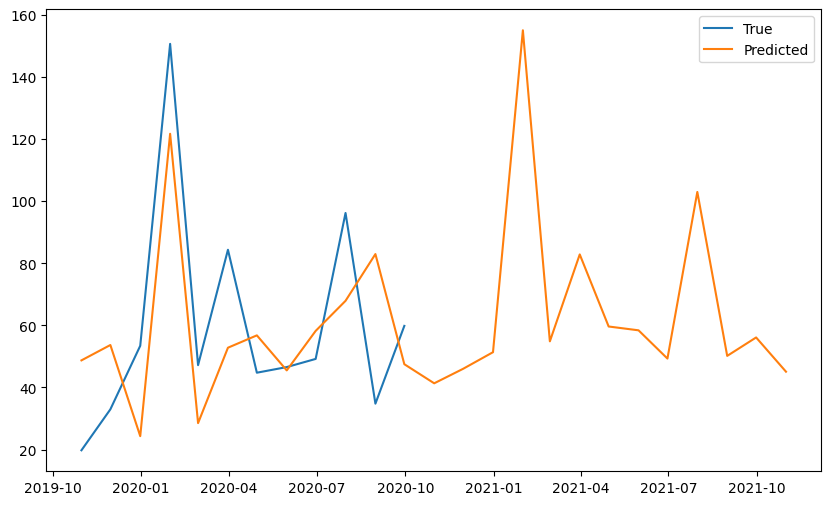

2019-10-31     48.722185
2019-11-30     53.663131
2019-12-31     24.328438
2020-01-31    121.639469
2020-02-29     28.526121
2020-03-31     52.793767
2020-04-30     56.766548
2020-05-31     45.493464
2020-06-30     58.198129
2020-07-31     67.879824
2020-08-31     82.926623
2020-09-30     47.485849
2020-10-31     41.339875
2020-11-30     46.004436
2020-12-31     51.349482
2021-01-31    154.943742
2021-02-28     54.843157
2021-03-31     82.813678
2021-04-30     59.618784
2021-05-31     58.390621
2021-06-30     49.297348
2021-07-31    102.924021
2021-08-31     50.164451
2021-09-30     56.091892
2021-10-31     45.078202
Freq: M, Name: predicted_mean, dtype: float64

In [28]:
import model_predict
import importlib
importlib.reload(model_predict)
model_predict.predict_to_future_arima(results, series, last_months=12)